In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#my libraries
import sys
sys.path.append("../code")

import myUtilities

import importlib
importlib.reload(myUtilities)


<module 'myUtilities' from 'd:\\education\\sem 9 SIGMA\\convex optimization\\lab 3\\notebooks\\../code\\myUtilities.py'>

In [29]:
#parameters
image_name = "penguin"
image_path = f"../resources/{image_name}.png"
seed = 42
noise_ratio = 0.7
dimension = 256
kernel_size = 3

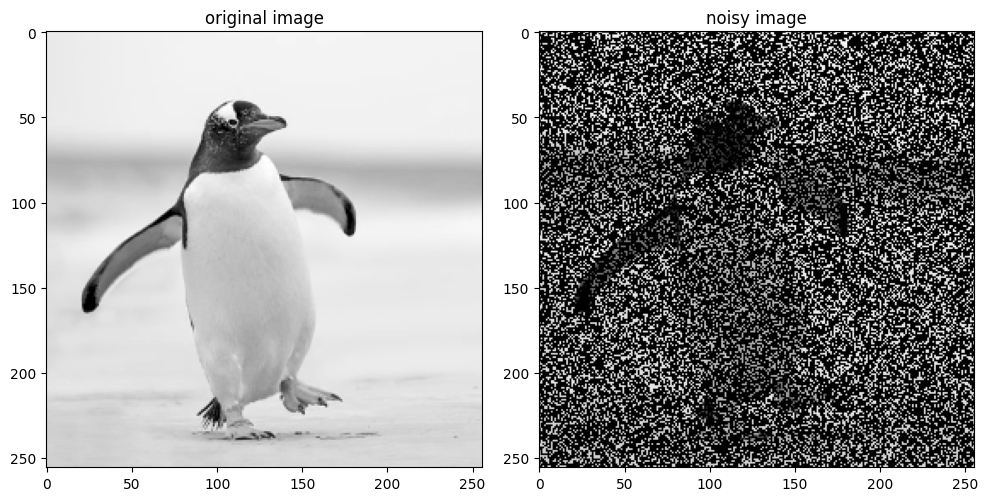

In [30]:
#import the original 
img_OG = cv.resize(cv.imread(image_path,0) , (dimension,dimension))

#add noise
dim = img_OG.shape[0] #image dimension for one axis
noise_indeces = myUtilities.define_noise_mask(dim,noise_ratio,seed = seed)
img_noisy = myUtilities.mask_Image(img_OG,noise_indeces)

#plot original and noisy image

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # figsize adjusts the overall figure size

ax[0].imshow(img_OG,'gray')
ax[0].set_title('original image')

ax[1].imshow(img_noisy,'gray')
ax[1].set_title('noisy image')

plt.tight_layout()
plt.show()

naive method

the method is to use a kernal to replace each zero pixel with the median of it's non zero neigbors

In [31]:
def apply_kernel(image,kernel_size):
    # Get image dimensions
    rows, cols = image.shape
    
    # Create an output image of the same size
    output_image = np.zeros_like(image)
    
    # Define kernel size
    pad = kernel_size // 2
    
    # Iterate over each pixel in the image
    for i in range(pad, rows - pad):
        for j in range(pad, cols - pad):
            # Extract the 5x5 neighborhood (kernel) around the current pixel
            neighborhood = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            
            # Flatten the neighborhood into a 1D array and remove zeros
            non_zero_values = neighborhood[neighborhood != 0]
            
            # If no non-zero values, retain the original pixel (or handle as needed)
            if non_zero_values.size == 0:
                median_value = 0
            else:
                # Calculate the median of the non-zero values
                median_value = np.median(non_zero_values)
            
            # Set the output pixel to the computed median
            output_image[i, j] = median_value
    
    return output_image


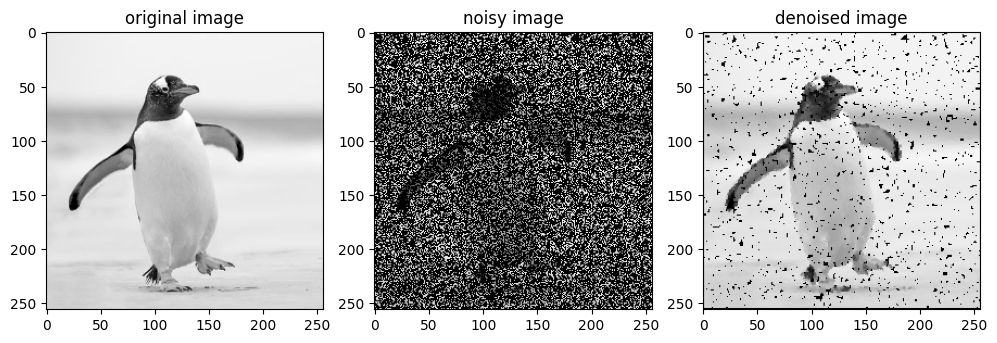

In [32]:
#testing the method
img_filtered = apply_kernel(img_noisy,kernel_size)

#plot original , noisy and reconstructed image

fig, ax = plt.subplots(1, 3, figsize=(10, 5))  # figsize adjusts the overall figure size

ax[0].imshow(img_OG,'gray')
ax[0].set_title('original image')

ax[1].imshow(img_noisy,'gray')
ax[1].set_title('noisy image')

ax[2].imshow(img_filtered,'gray')
ax[2].set_title('denoised image')

plt.tight_layout()
plt.show()

In [33]:
#save result
regulized_image = ((1-img_filtered) * 255).astype(np.uint8)
cv.imwrite(f'../tests/{image_name}_{dimension}_{noise_ratio}_Naive.jpeg',regulized_image)

True